In [36]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import spectools as sp
import importlib
plt.rcParams["figure.figsize"] = (20,10)

In [129]:
importlib.reload(pa)

<module 'pyaxions.jaxions' from '/Users/madomaxo/Salsa/jaxions/jaxions/scripts/pyaxions/jaxions.py'>

In [234]:
f  = pa.findmfiles('out')
logi = pa.gml(f ,'logi') 
ct   = pa.gml(f ,'ct') 
# st  = pa.stringo(f)
f[-1]

'out/m/axion.m.00193'

In [235]:
mask = pa.gml(f,'nsp?') * (pa.gml(f,'ftype') == 'Saxion')
ct = pa.gml(f[mask],'ct')

In [236]:
eAM = pa.gml(f[mask],'eAKmask4.00')
eA = pa.gml(f[mask],'eAK')

In [237]:
nmp = pa.gml(f[mask],'enmpmask4.00')


In [238]:
aRho = pa.gml(f[mask],'eavrho') 

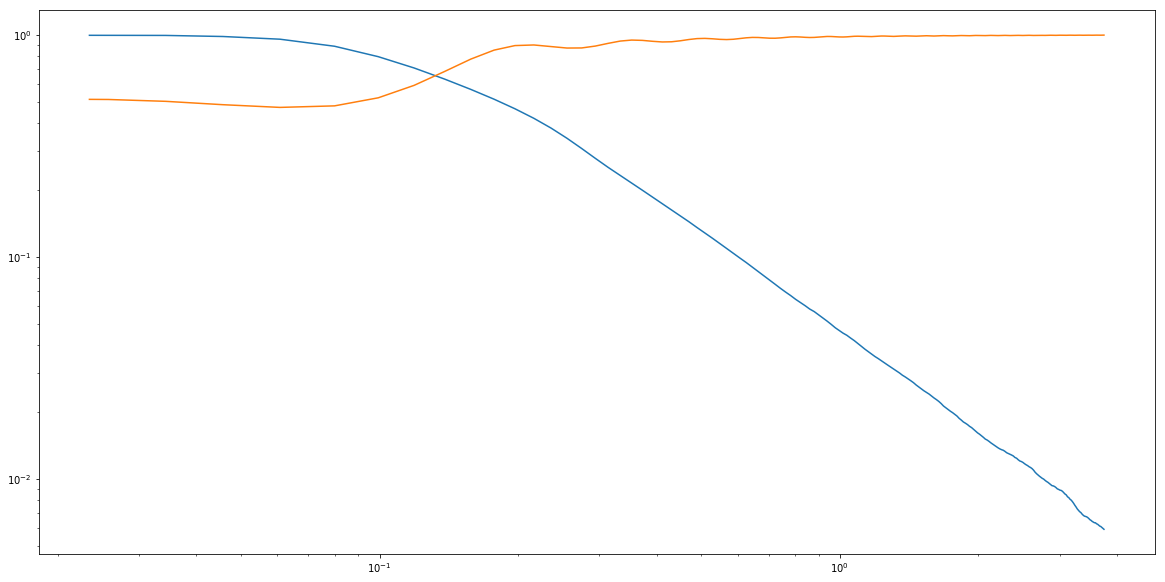

In [239]:
plt.loglog(ct,nmp/Nt)
plt.loglog(ct,aRho)

In [240]:
Nt=256**3

# Legend

Kenichi defines the axion energy density estimate

$\rho_a = \langle\left(\text{Im}\frac{\Phi_t}{\Phi}\right)^2\rangle$

The Vector energy function outputs

${\cal K} = \frac{1}{2}\langle\left(\rho \text{Im}\frac{\Phi_\tau}{\Phi}\right)^2\rangle$

Inside the string mask and the total

The Outside can be computed as 

${\cal K}_{out} = \frac{N_t{\cal K}_t -N_m{\cal K}_m}{N_t -N_m}$

and we find the equality

$\rho_a \sim 2{\cal K}_{out}\frac{1}{\rho^2 R^2}$

because 

$\frac{d\Phi}{dt}=\frac{1}{R}\frac{d\Phi}{d\tau}$

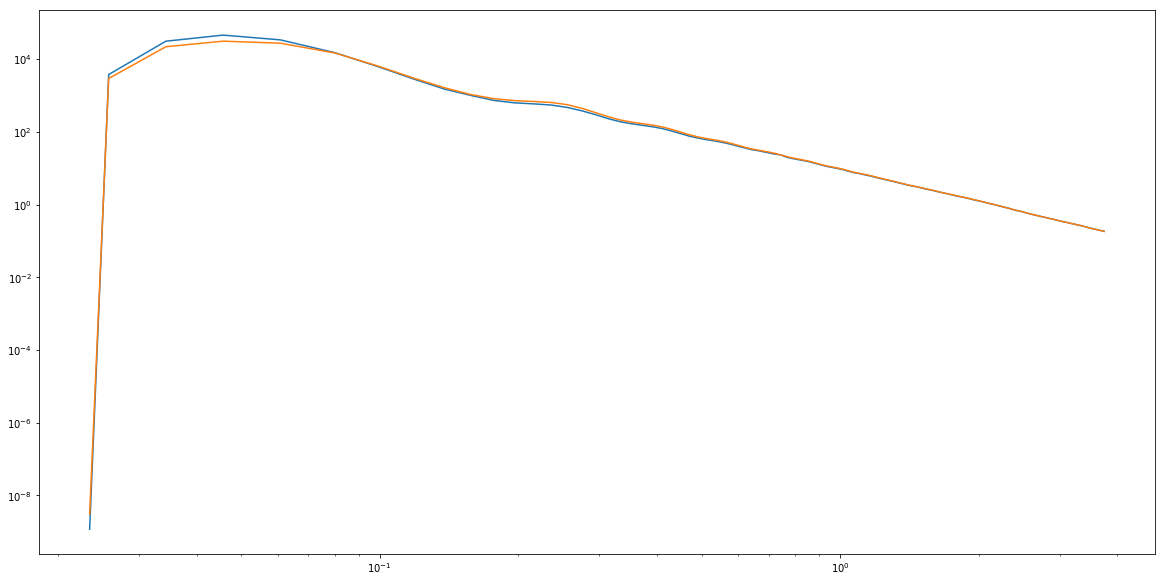

In [241]:
plt.loglog(ct,pa.gml(f[mask],'strme_eA_4.00'))
plt.loglog(ct,(eA*Nt-eAM*nmp)/(Nt-nmp)/ct**2*2/aRho**2)

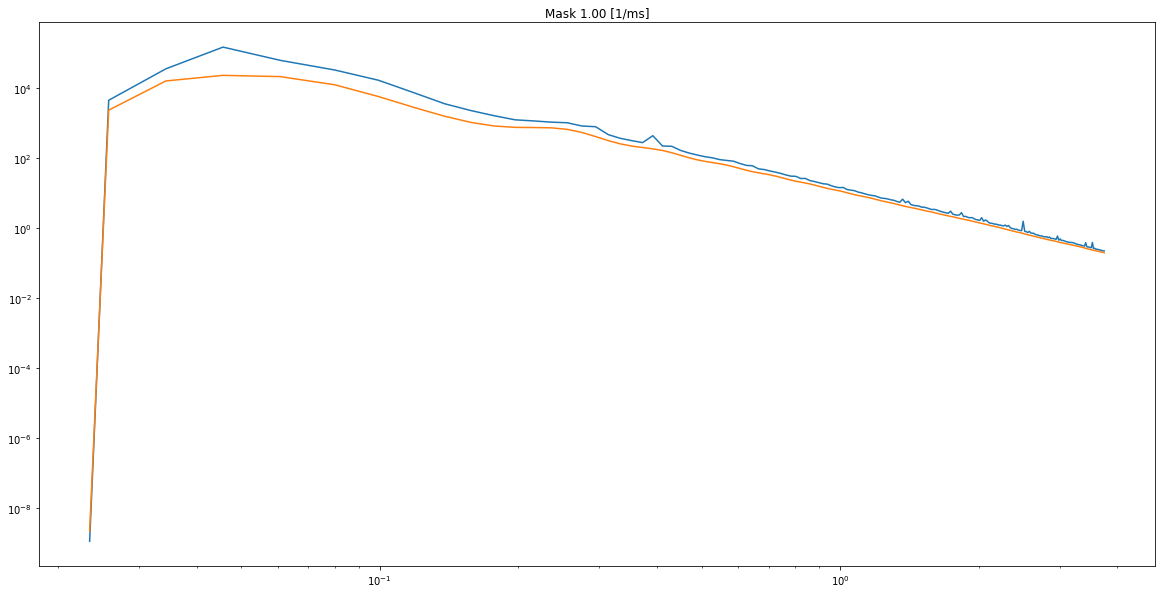

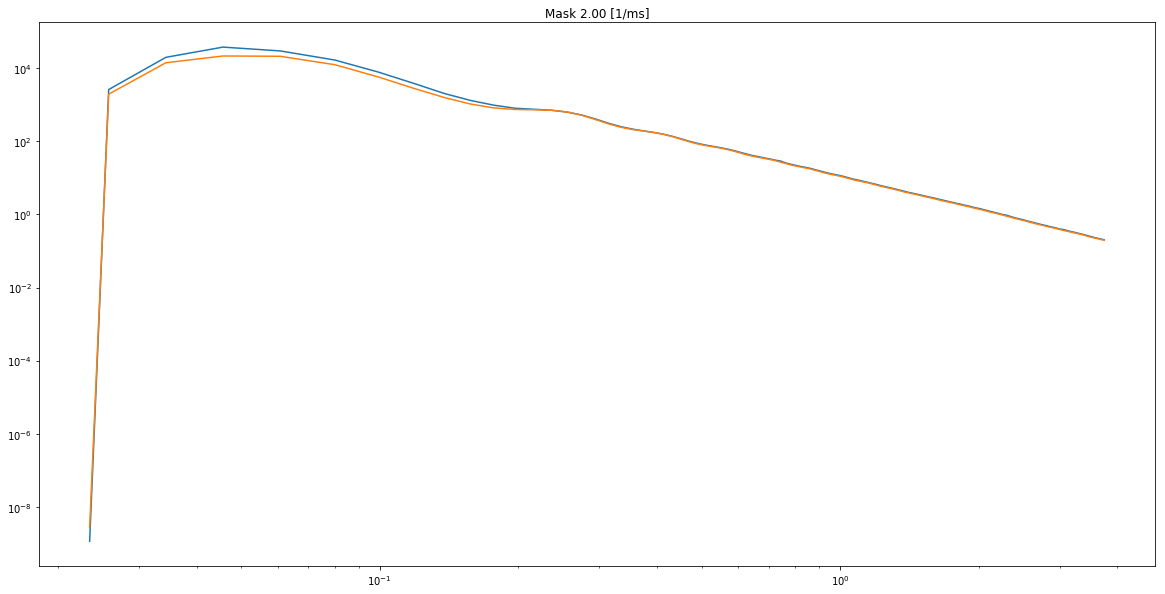

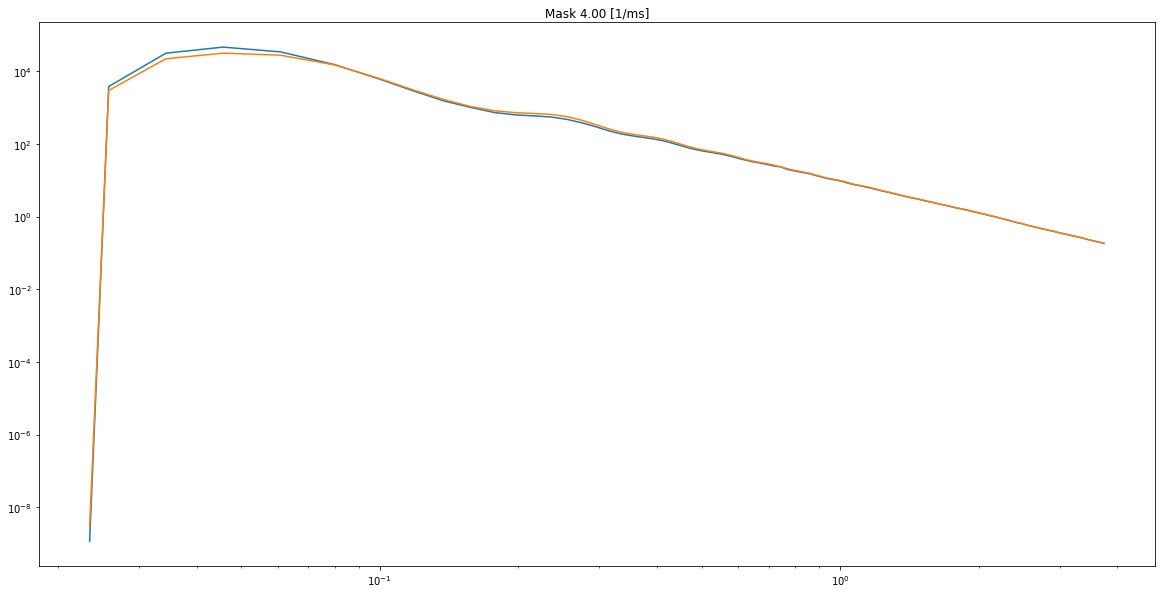

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


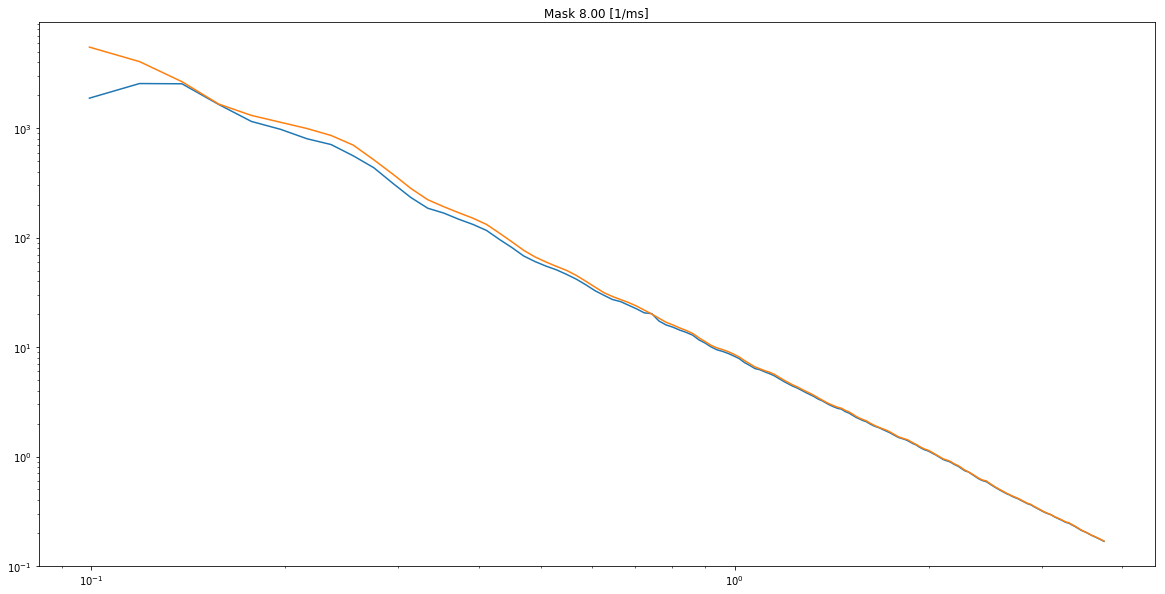

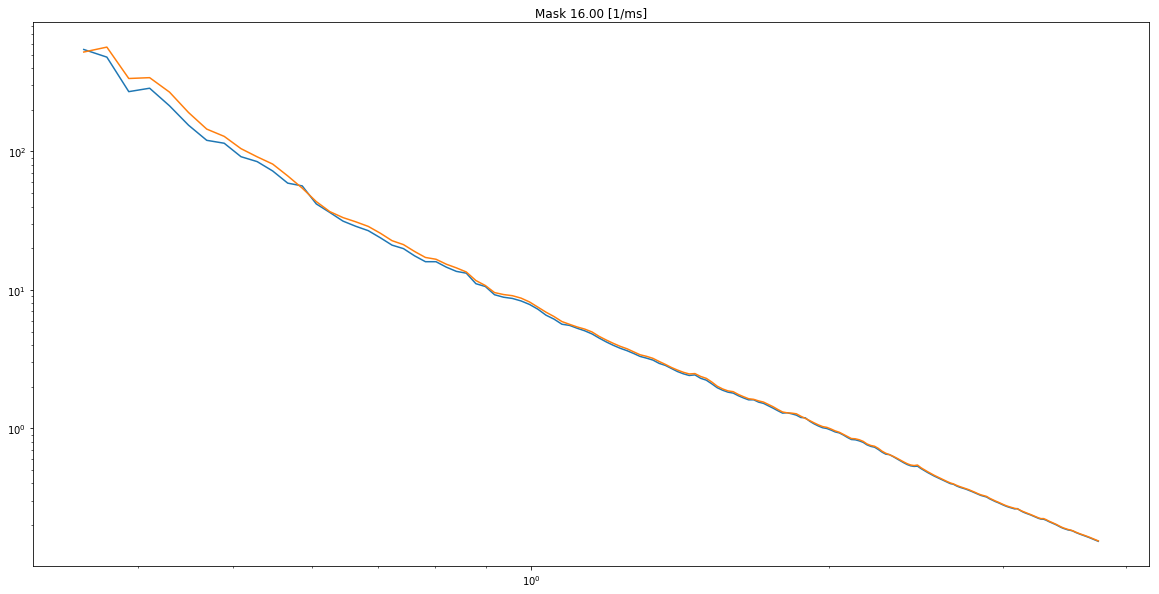

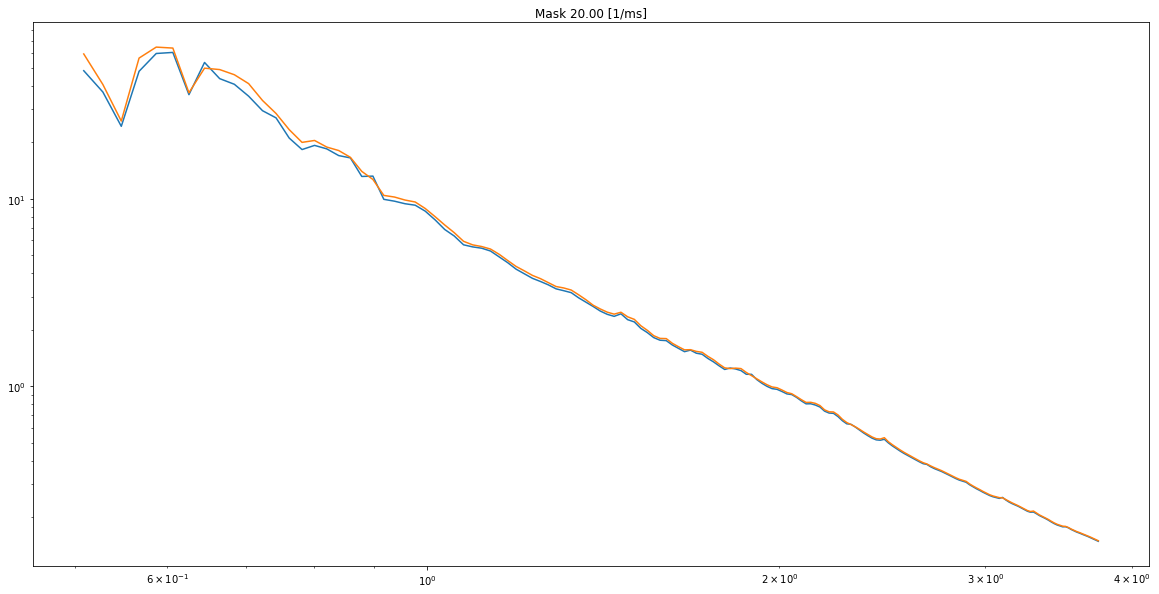

In [242]:
for ii in [1,2,4,8,16,20]:
    i = str(ii)
    eAM = pa.gml(f[mask],'eAKmask'+i+'.00')
    eA = pa.gml(f[mask],'eAK')
    nmp = pa.gml(f[mask],'enmpmask'+i+'.00')
    plt.title('Mask '+i+'.00 [1/ms]')
    plt.loglog(ct,pa.gml(f[mask],'strme_eA_'+i+'.00'))
    plt.loglog(ct,(eA*Nt-eAM*nmp)/(Nt-nmp)/ct**2*2/aRho**2)
    plt.show()

# Comparison between masks

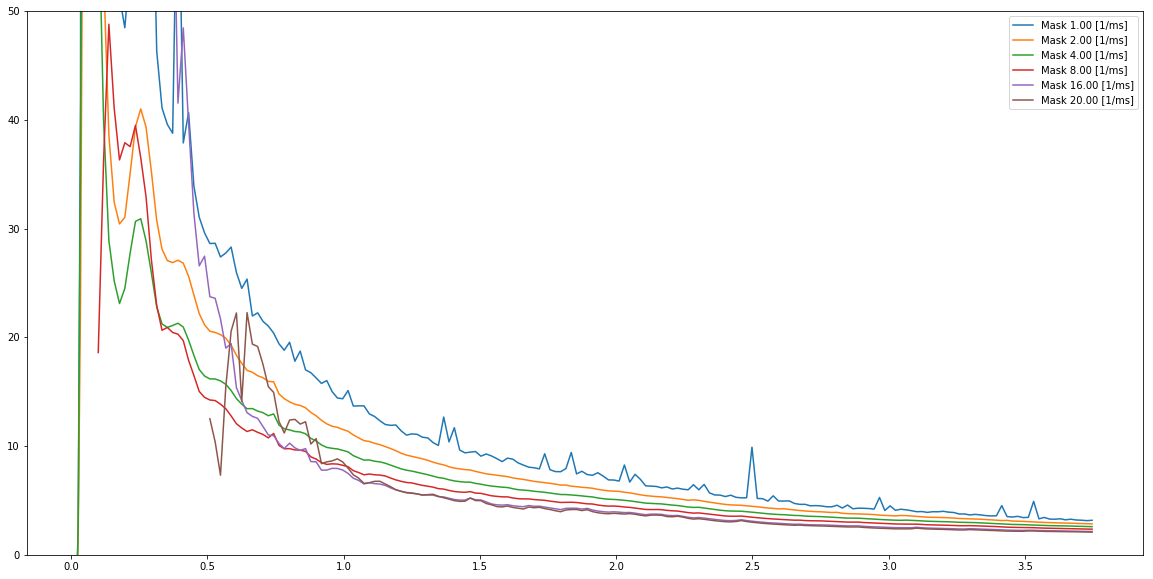

In [243]:
for ii in [1,2,4,8,16,20]:
    i = str(ii)
    eAM = pa.gml(f[mask],'eAKmask'+i+'.00')
    eA = pa.gml(f[mask],'eAK')
    nmp = pa.gml(f[mask],'enmpmask'+i+'.00')
    plt.plot(ct,ct**2*pa.gml(f[mask],'strme_eA_'+i+'.00'),label='Mask '+i+'.00 [1/ms]')
#     plt.loglog(ct,(eA*Nt-eAM*nmp)/(Nt-nmp)/ct**2*2/aRho**2,'--')
plt.ylim([0,50])
plt.legend()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


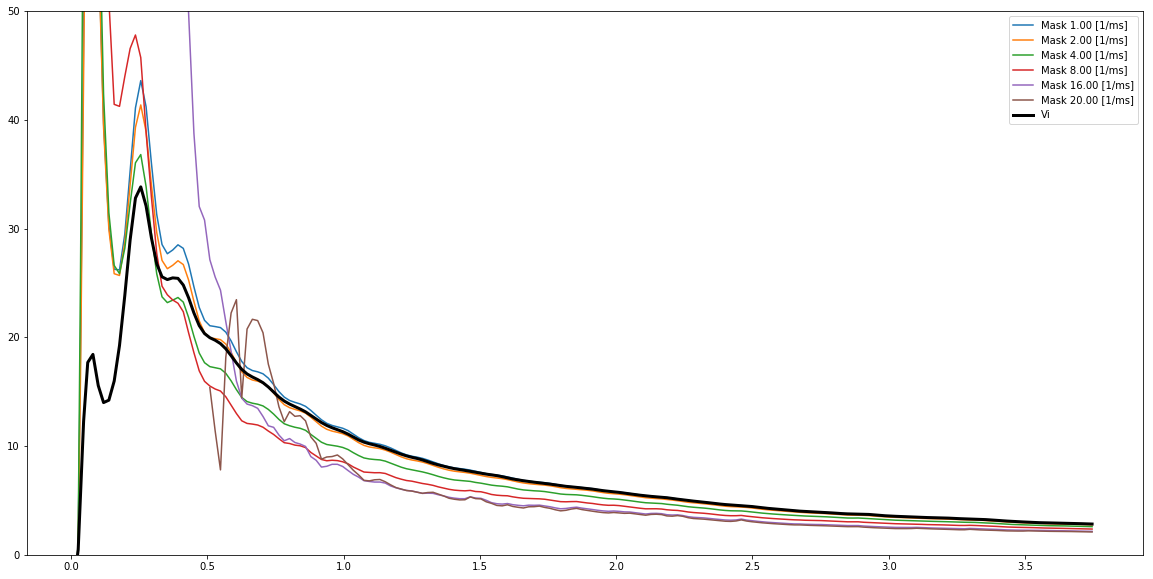

In [244]:
for ii in [1,2,4,8,16,20]:
    i = str(ii)
    eAM = pa.gml(f[mask],'eAKmask'+i+'.00')
    eA = pa.gml(f[mask],'eAK')
    nmp = pa.gml(f[mask],'enmpmask'+i+'.00')
#     plt.loglog(ct,pa.gml(f[mask],'strme_eA_'+i+'.00'))
    plt.plot(ct,(eA*Nt-eAM*nmp)/(Nt-nmp)*2/aRho**2,label='Mask '+i+'.00 [1/ms]')
plt.plot(ct,eA*2,'k',linewidth=3,label='Vi')
plt.ylim([0,50])
plt.legend()

# Spectra

In [250]:
nm=pa.gm(f[0],'nmodelist')

In [251]:
smask = pa.gml(f,'msp?')


In [252]:
lis=pa.gm(f[1],'msp_info')
lis

['M_Red_1.00',
 'M_Red_16.00',
 'M_Red_2.00',
 'M_Red_20.00',
 'M_Red_4.00',
 'M_Red_8.00',
 'W_Red_1.00',
 'W_Red_16.00',
 'W_Red_2.00',
 'W_Red_20.00',
 'W_Red_4.00',
 'W_Red_8.00']

In [253]:
# --spKGV 1=K, 2=G, 4=V; --spKGV 1

(0.0001, 10)

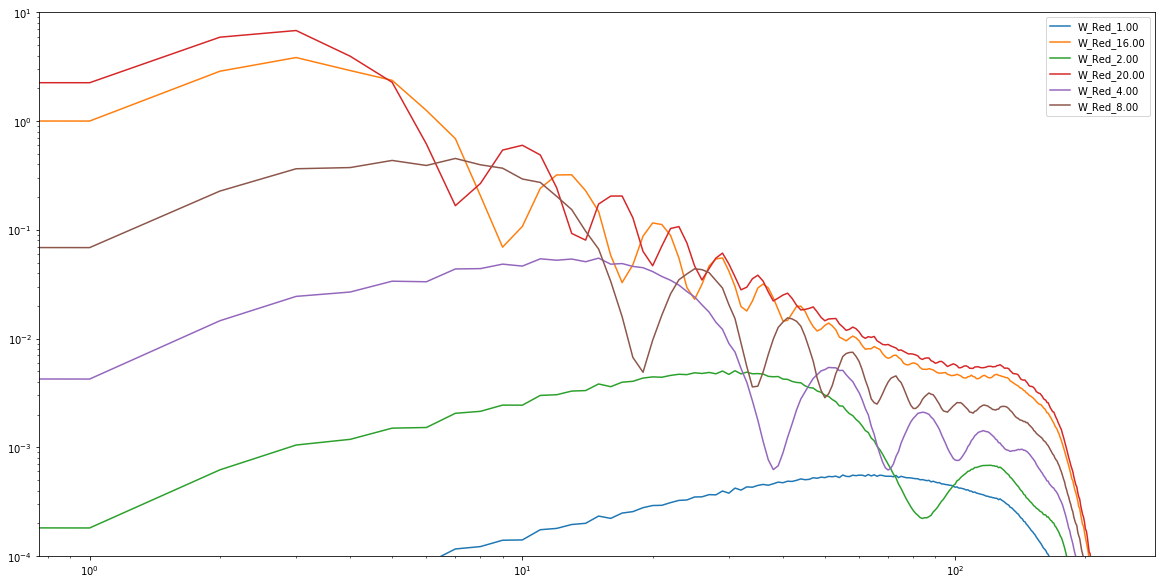

In [254]:
fig,ax=plt.subplots(1)
for st in lis:
    if (st[0] is not 'M'):
        a=pa.gm(f[-1],'msp'+st)
        ax.loglog(a,label=st)
plt.legend()
plt.ylim([0.0001,10])

In [255]:
lis=pa.gm(f[1],'nsp_info')
lis

['sG_Red_1.00',
 'sG_Red_16.00',
 'sG_Red_2.00',
 'sG_Red_20.00',
 'sG_Red_4.00',
 'sG_Red_8.00',
 'sK_Red_1.00',
 'sK_Red_16.00',
 'sK_Red_2.00',
 'sK_Red_20.00',
 'sK_Red_4.00',
 'sK_Red_8.00']

(0.1, 200)

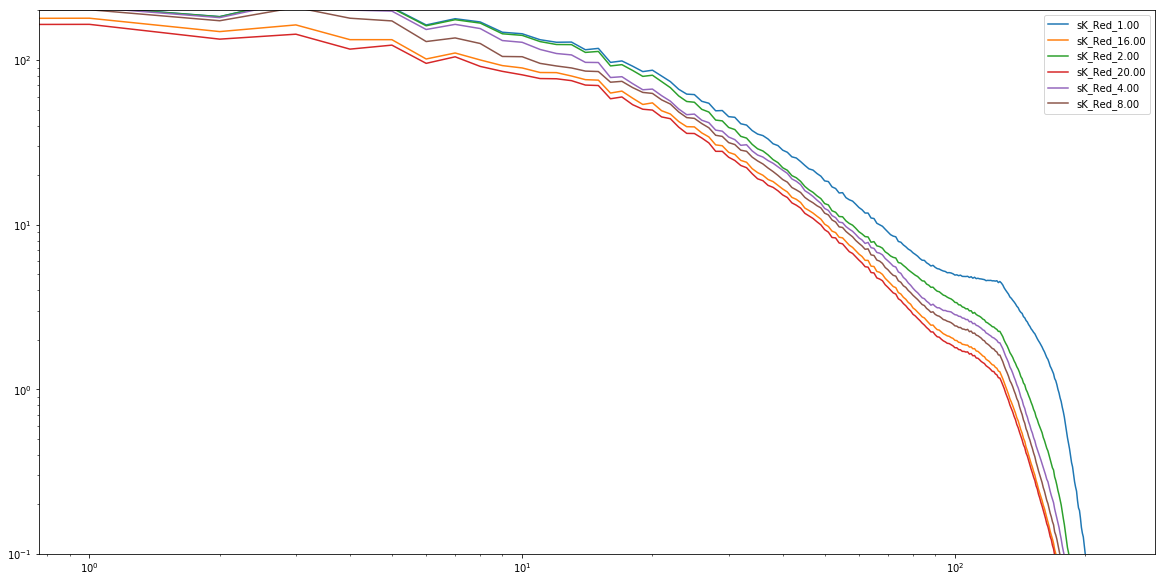

In [256]:
fig,ax=plt.subplots(1)
for st in lis:
    if (st[:2] == 'sK'):
        a=pa.gm(f[-1],'nsp'+st[1:])
        ax.loglog(a,label=st)
plt.legend()
plt.ylim([0.1,200])

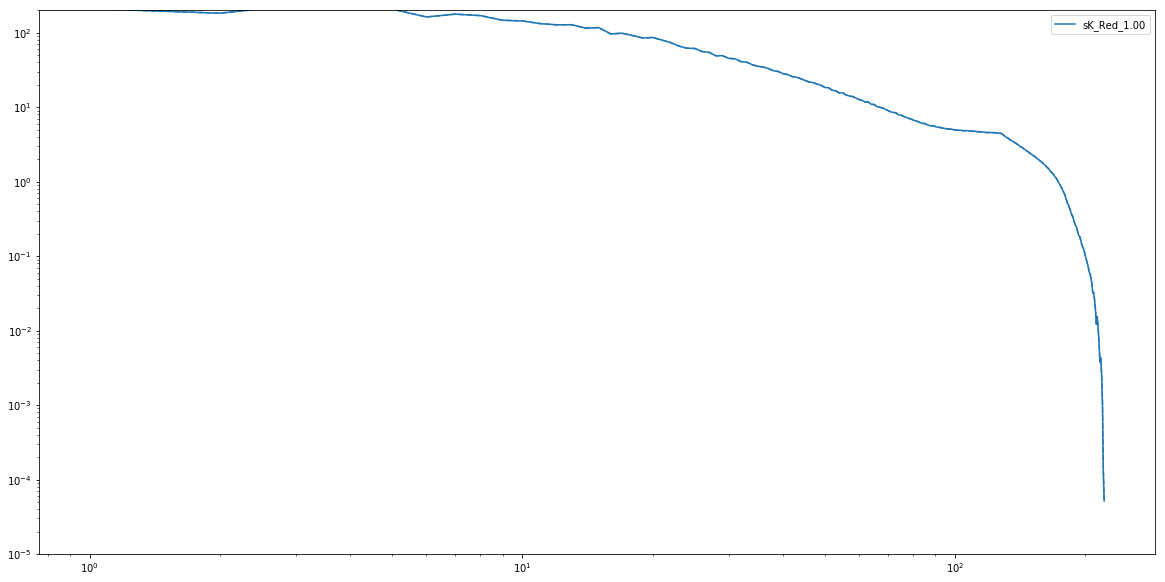

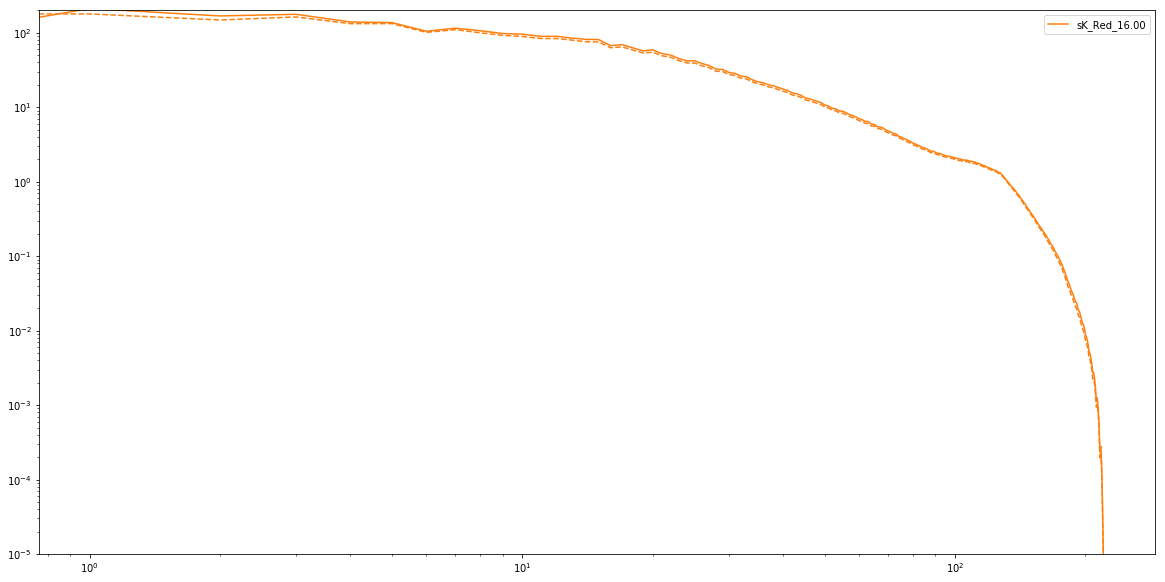

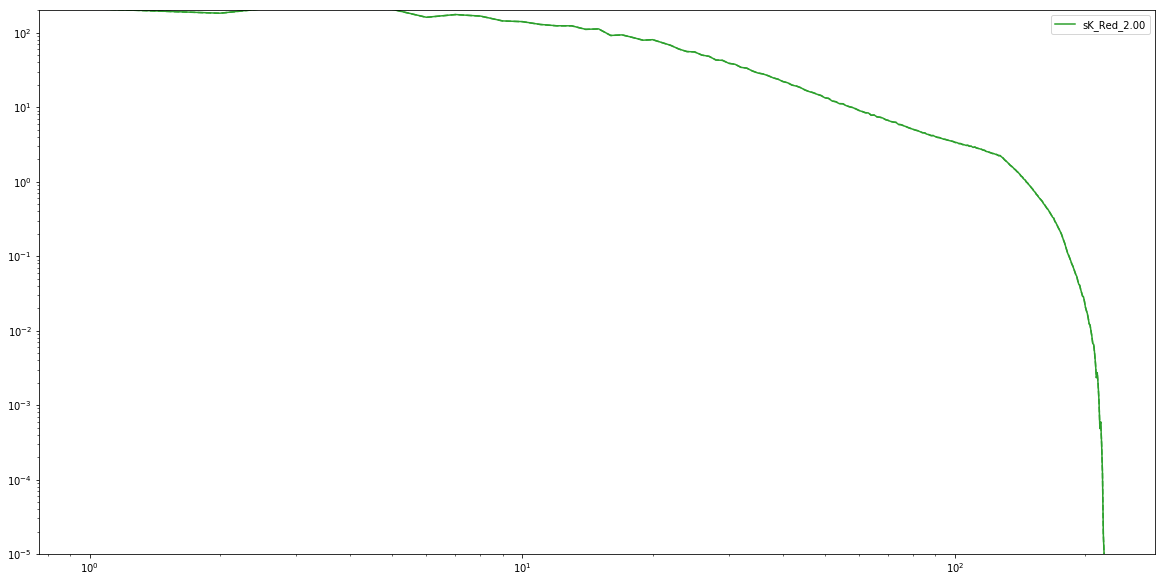

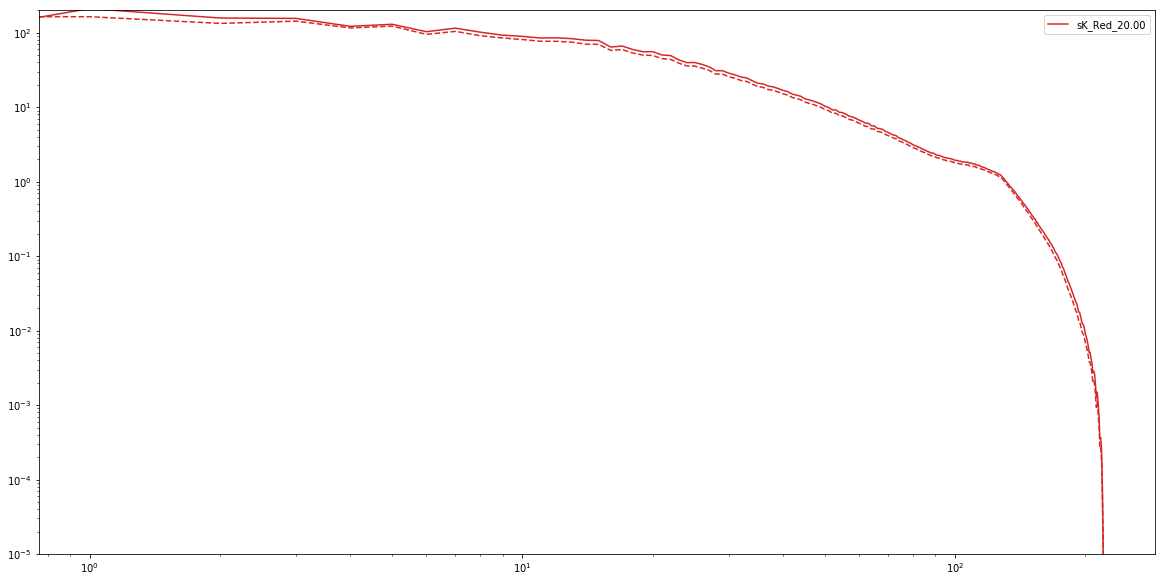

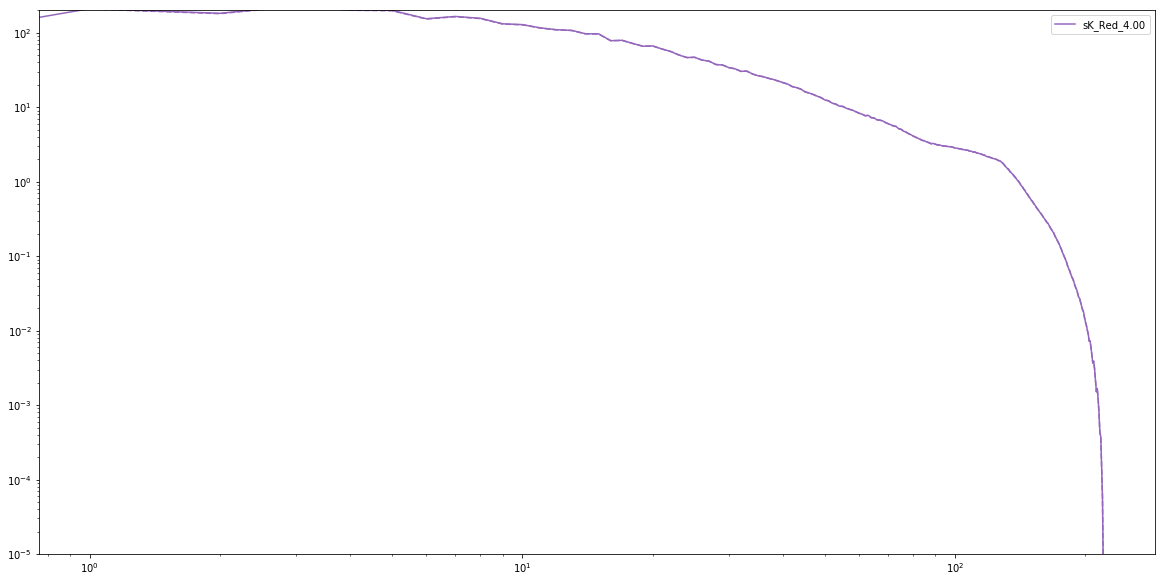

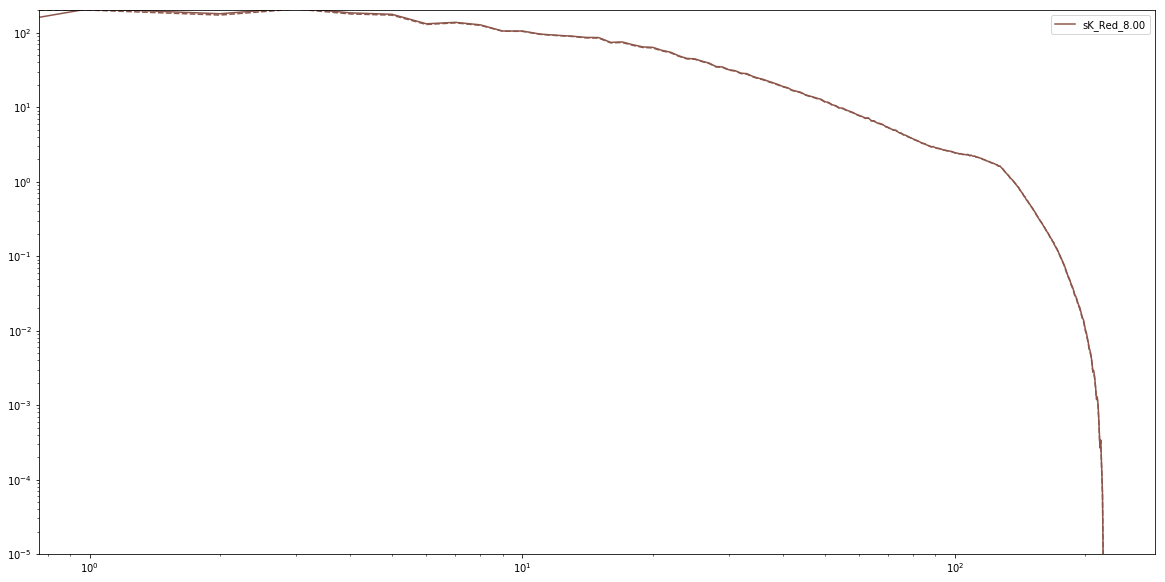

In [257]:
id=-1
i=0 
for st in lis:
    if (st[:2] == 'sK'):
        fig,ax=plt.subplots(1)
        c="C"+str(i)
        a=sp.nspcore(f[id],nm,st[1:])
        b=pa.gm(f[id],'nsp'+st[1:])
        ax.loglog(a,c=c,label=st)
        ax.loglog(b,'--',c=c)
        i=i+1
        plt.legend()
        plt.ylim([1e-5,200])
        plt.show()


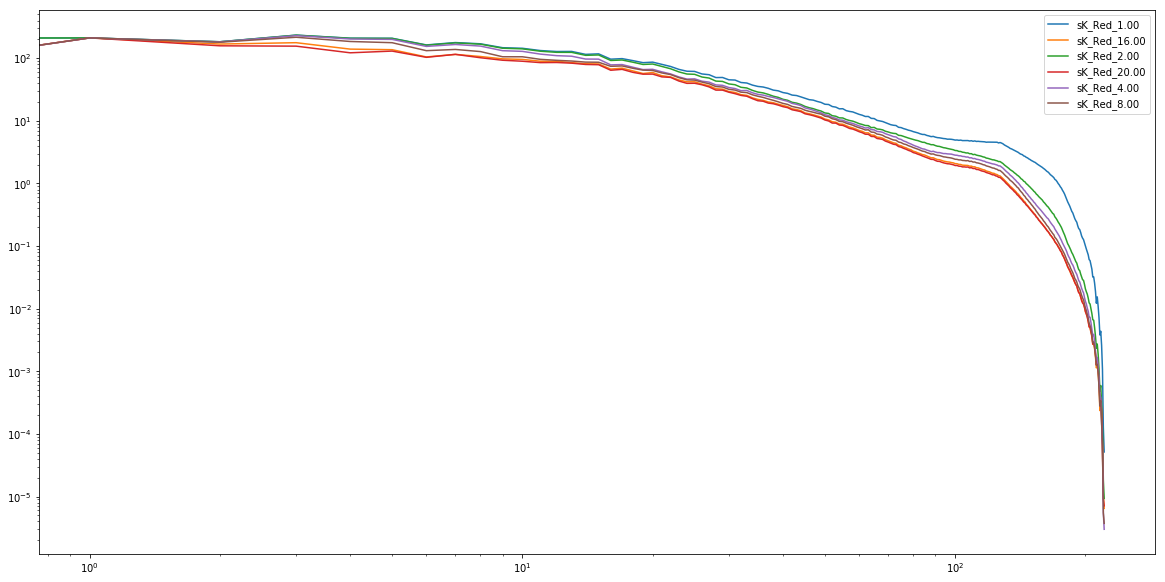

In [258]:
fig,ax=plt.subplots(1)
id=-1
i=0 
for st in lis:
    if (st[:2] == 'sK'):

        c="C"+str(i)
        a=sp.nspcore(f[id],nm,st[1:])
        ax.loglog(a,c=c,label=st)
        i=i+1
        plt.legend()
